Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing


In [3]:
# loading the csv data to a pandas Dataframe
gold_data=pd.read_csv("/content/gold price data.zip")

In [4]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
#getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking the number of string values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#getting the statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1.Positive Correlation
2.Negative Correlation

In [11]:
correlation=gold_data.corr()

<ipython-input-11-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

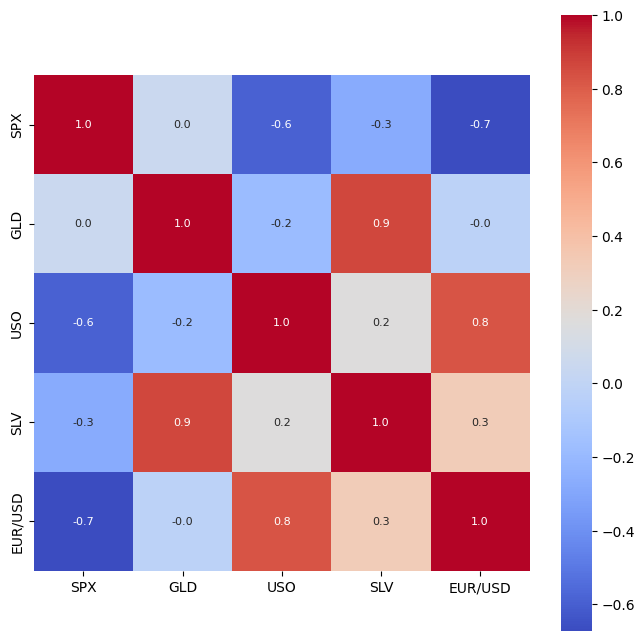

In [18]:
#constructing a heatmap to understand the correlation
plt.figure(figsize =(8,8))
sns.heatmap(correlation ,cbar=True ,square=True ,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')

In [19]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-20-c6417c6abb63>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

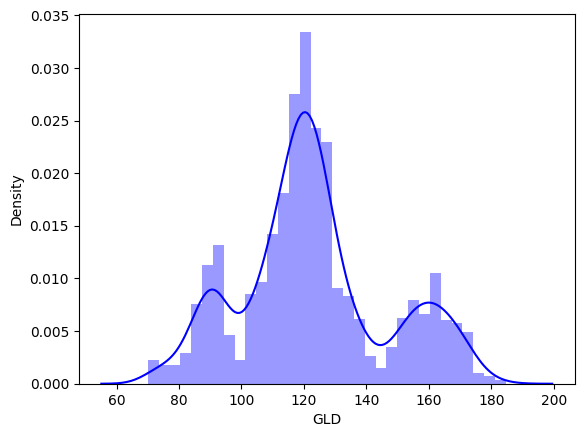

In [20]:
sns.distplot(gold_data['GLD'],color='blue')

In [21]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size = 0.2, random_state=43)


In [25]:
regressor=RandomForestRegressor(n_estimators=100)


In [26]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
test_data_prediction = regressor.predict(X_test)


In [28]:
print(test_data_prediction)


[120.40050023 120.10809943 164.84850154  89.61289992 125.26729946
 140.89450027  91.20140082 161.12369965 127.56679873  90.53490047
 104.6232     125.32980082 118.41500043 159.97430111  88.2840991
 124.48610114 107.29530135 115.43429874 110.2877998  115.0803001
 118.46580019 106.73899891 122.67469791 126.13829968 122.52169951
 169.27779965 118.51840136 121.83649873 142.00130246 107.66950059
 132.11389831 160.69209805 104.85090108 107.40899965  94.45170063
 162.16800435 114.53629981 113.76439872 125.2325008  113.80770083
 102.93500049 107.1089003  122.36859965 158.02500024 115.460599
 115.67060101 155.50550104 155.46850372 110.38279786  80.69179979
 128.24910146 119.98980115 152.28419823  96.13179902 127.82150092
 114.38850008 112.29970127 155.17190011 168.39449857  92.01369951
 117.78310046  87.56929795 135.89239974 157.85590047 102.96259991
 150.88239965 124.3319     162.14959869 118.01219916 104.53700155
 147.83610206 119.88480047 172.20410067 121.7844009  166.0274014
 132.19240166 1

In [29]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error:",error_score)


R Squared Error: 0.98864667902793


In [30]:
Y_test = list(Y_test)

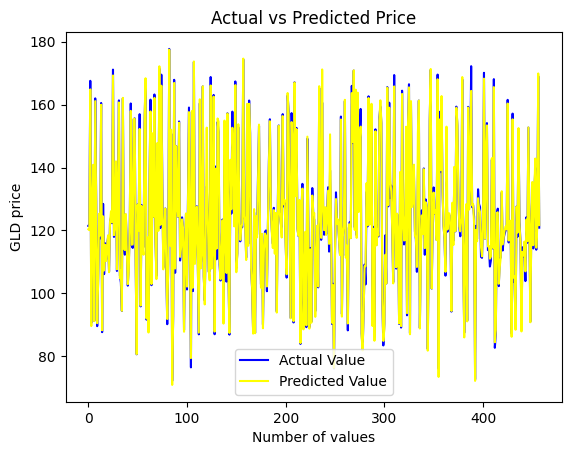

In [31]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='yellow',label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()